# SVM и его ядра
__Суммарное количество баллов: 10__

In [243]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.ensemble import RandomForestClassifier

### Задание 1 (7 баллов)

Примените метод SVM (например, из библиотеки sklearn) для датасета blobs2.

Визуализируйте результат (разбиение плоскости и опорные вектора) при разных вариантах ядер (линейное; полиномиальное степеней 2,3,5; RBF).

In [194]:
# визуализация SVM
def visualise(clf, X_test, y_test, X, y):
    y_pred = clf.predict(X_test)
    print(clf[1])
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Precision: {precision_score(y_test, y_pred)}')
    print(f'Recall: {recall_score(y_test, y_pred)}')
    
    plt.figure(figsize=(15, 10))
    
    ax = plt.gca()
    
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y)
        
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
    
    support_vector_transformed = clf[0].inverse_transform(clf[1].support_vectors_)

    ax.scatter(support_vector_transformed[:, 0], support_vector_transformed[:, 1],
               linewidth=1, facecolors='none', edgecolors='black')    
    plt.show()

In [195]:
# сделаем пайплайн для обучения SVM со скейлингом
def svm_pipeline(X, y, kernel='linear', degree=2):
    clf = make_pipeline(StandardScaler(), 
                        SVC(kernel=kernel, degree=degree))
    clf.fit(X, y)
    return clf

In [196]:
df = pd.read_csv('hw7_data/blobs2.csv')
y = df.label
X = df.drop(columns=['label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

SVC(degree=2, kernel='linear')
Accuracy: 0.975
Precision: 0.9514563106796117
Recall: 1.0


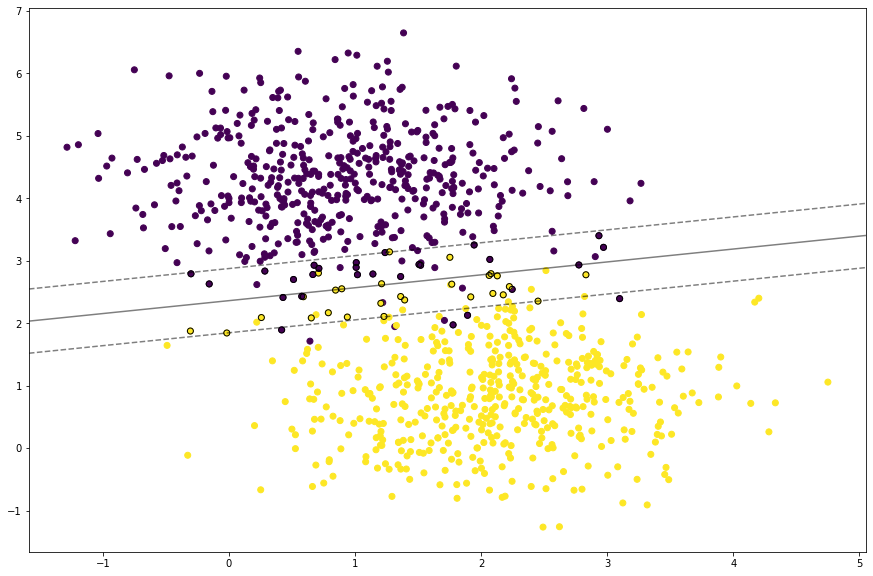

In [197]:
clf = svm_pipeline(X_train, y_train, kernel='linear')
visualise(clf, X_test, y_test, X, y)

SVC(degree=2, kernel='poly')
Accuracy: 0.485
Precision: 0.48704663212435234
Recall: 0.9591836734693877


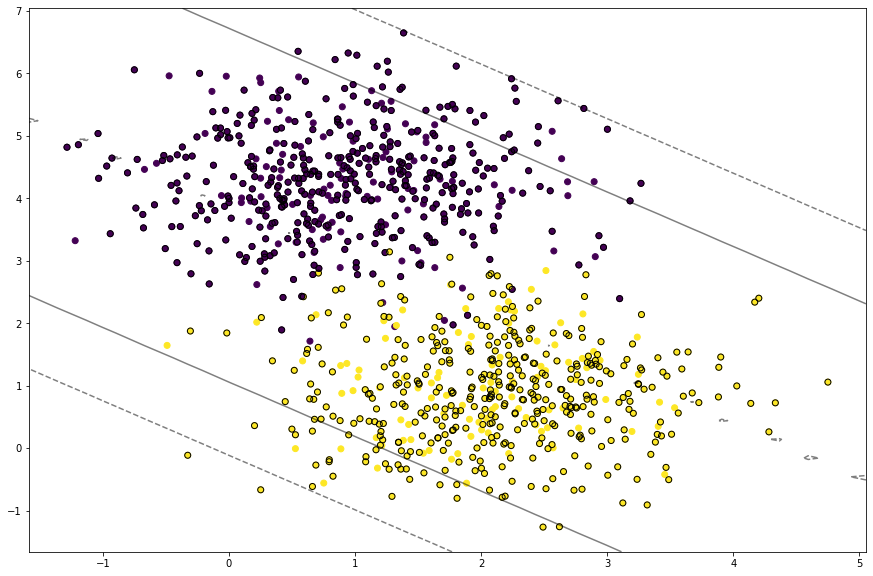

In [208]:
clf = svm_pipeline(X_train, y_train, kernel='poly', degree=2)
visualise(clf, X_test, y_test, X, y)

SVC(kernel='poly')
Accuracy: 0.955
Precision: 0.9158878504672897
Recall: 1.0


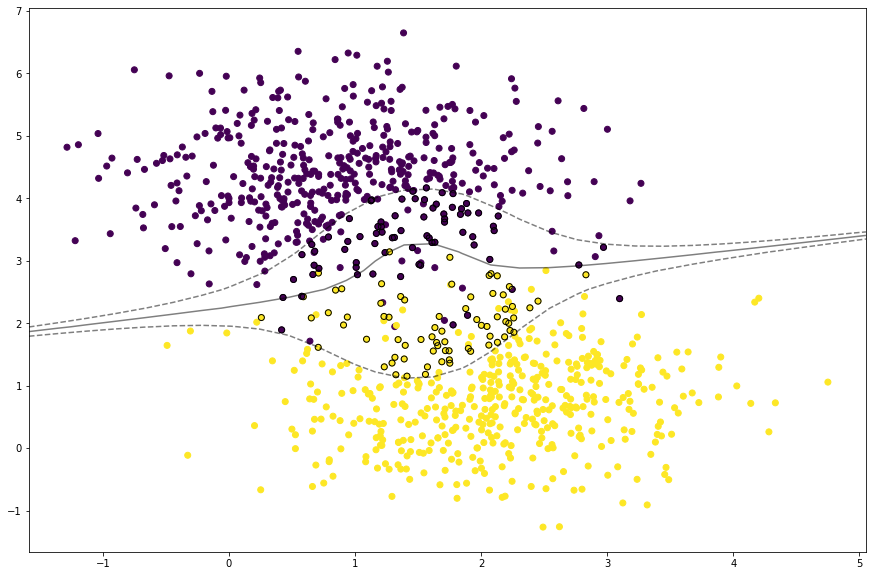

In [200]:
clf = svm_pipeline(X_train, y_train, kernel='poly', degree=3)
visualise(clf, X_test, y_test, X, y)

SVC(degree=5, kernel='poly')
Accuracy: 0.945
Precision: 0.8990825688073395
Recall: 1.0


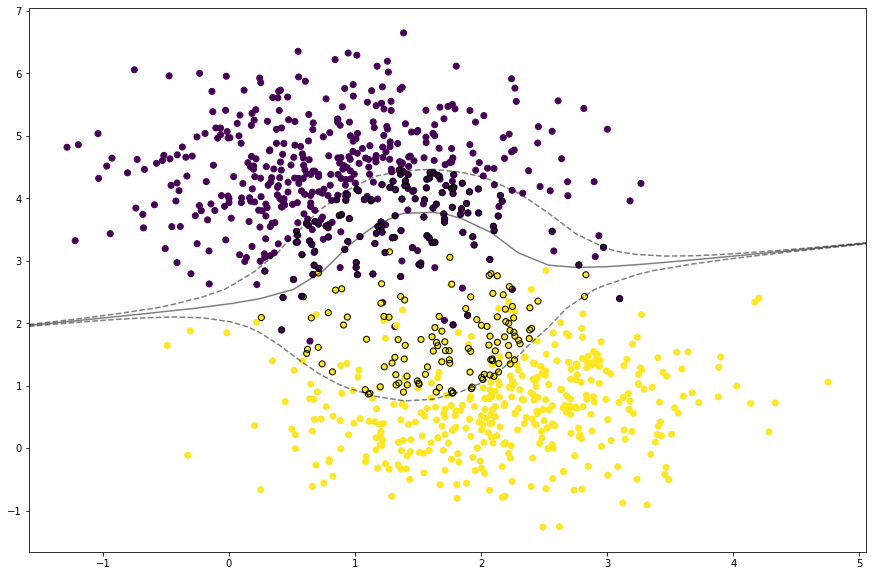

In [201]:
clf = svm_pipeline(X_train, y_train, kernel='poly', degree=5)
visualise(clf, X_test, y_test, X, y)

SVC(degree=2)
Accuracy: 0.975
Precision: 0.9514563106796117
Recall: 1.0


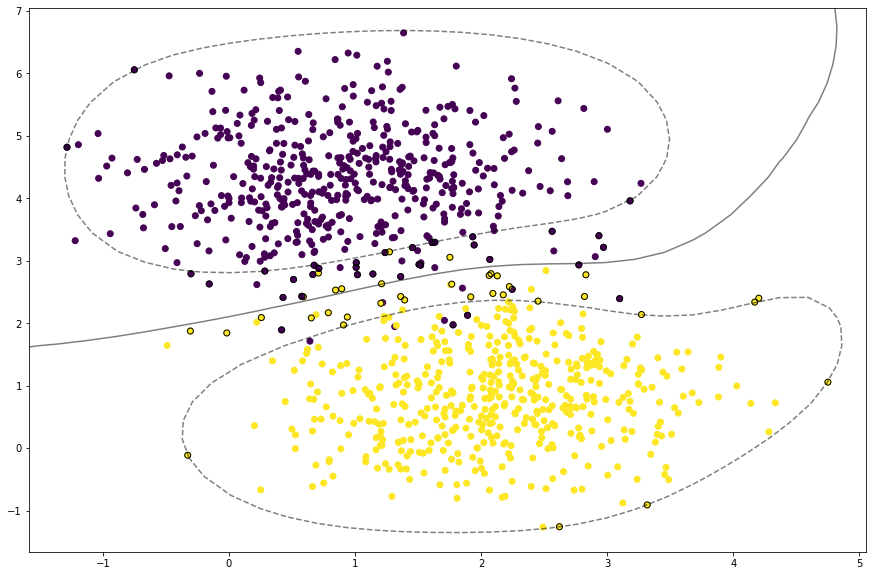

In [202]:
clf = svm_pipeline(X_train, y_train, kernel='rbf')
visualise(clf, X_test, y_test, X, y)

### Задание 2 (3 балла)

Примените метод SVM на датасетах cancer и spam, разбитый предварительно на train (80%) и validate (20%). 

Сравните время работы SVM и Random Forest при близкой точности.

In [244]:
def report(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    print(clf[-1])
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Precision: {precision_score(y_test, y_pred)}')
    print(f'Recall: {recall_score(y_test, y_pred)}')

In [255]:
def random_forest_pipeline(X, y, max_depth=5, n_estimators=100):
    clf = RandomForestClassifier(max_depth=max_depth, n_estimators=max_depth, random_state=42)
    clf.fit(X, y)
    return clf

In [256]:
cancer = pd.read_csv('hw7_data/cancer.csv')
cancer_y = cancer['label']
cancer_y = cancer_y.map({'M': 0, 'B': 1})
cancer_X = cancer.drop(columns=['label'])

spam = pd.read_csv('hw7_data/spam.csv')
spam_y = spam.label
spam_X = spam.drop(columns=['label'])

In [262]:
def full_report(X, y):
    print(f'X shape: {X.shape}')
    print('\n')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    start_fit = time.time()
    clf = svm_pipeline(X_train, y_train, kernel='linear')
    end_fit = time.time()
    start_pred = time.time()
    report(clf, X_test, y_test)
    end_pred = time.time()
    print(f'Time fit: {(end_fit - start_fit) * 1000:.3f} ms')
    print(f'Time predict: {(end_pred - start_pred) * 1000:.3f} ms')
    print(f'Time: {(end_pred - start_fit) * 1000:.3f} ms')
    
    print('\n')
    start_fit = time.time()
    clf = random_forest_pipeline(X_train, y_train, max_depth=5, n_estimators=100)
    end_fit = time.time()
    start_pred = time.time()
    report(clf, X_test, y_test)
    end_pred = time.time()
    print(f'Time fit: {(end_fit - start_fit) * 1000:.3f} ms')
    print(f'Time predict: {(end_pred - start_pred) * 1000:.3f} ms')
    print(f'Time: {(end_pred - start_fit) * 1000:.3f} ms')

In [263]:
full_report(cancer_X, cancer_y)

X shape: (569, 30)


SVC(degree=2, kernel='linear')
Accuracy: 0.956140350877193
Precision: 0.9714285714285714
Recall: 0.9577464788732394
Time fit: 7.815 ms
Time predict: 5.884 ms
Time: 13.699 ms


DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=996406378)
Accuracy: 0.9385964912280702
Precision: 0.9444444444444444
Recall: 0.9577464788732394
Time fit: 12.915 ms
Time predict: 5.947 ms
Time: 18.862 ms


In [264]:
full_report(spam_X, spam_y)

X shape: (4601, 57)


SVC(degree=2, kernel='linear')
Accuracy: 0.9261672095548317
Precision: 0.9351351351351351
Recall: 0.8871794871794871
Time fit: 432.913 ms
Time predict: 27.341 ms
Time: 460.255 ms


DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=996406378)
Accuracy: 0.9044516829533116
Precision: 0.9660493827160493
Recall: 0.8025641025641026
Time fit: 15.193 ms
Time predict: 5.500 ms
Time: 20.693 ms


При сопоставимых результатах по точности Random Forest работает чуть дольше на маленьком датасете и значительно быстрее на большом датасете. При этом SVM замедляется в основном за счет времени обучения, хотя и время предсказания у него также больше.